In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import skew

In [5]:
dataframe =  pd.read_csv("/Users/konstantinosskianis/Desktop/test.csv")


In [6]:
#dataframe = dataframe.drop('latitude',axis=1)
#dataframe = dataframe.drop('longitude',axis=1)
dataframe.head()

,name,embadon,description,bedrooms,construction_year,selling_price
0,"Marina Zeas, Pireas, Greece",140,Maisonette,3.0,2007,290000.0
1,"Ilisia, Zografou, Greece",152,Apartment,3.0,1993,175000.0
2,"Ilisia, Zografou, Greece",55,Apartment,1.0,1982,54000.0
3,"Papagiamali, Heraklion, Greece",180,Apartment,3.0,2005,800000.0
4,"Filothei, Filothei, Greece",50,Apartment,1.0,2008,100000.0


In [7]:
dataframe.shape

(73656, 6)

In [8]:
dataframe.describe()

,embadon,bedrooms,construction_year,selling_price
count,73656.000000,73183.000000,73656.000000,7.365100e+04
mean,161.249253,2.662135,1995.042807,2.993710e+05
std,912.961630,1.411089,16.466902,5.781911e+05
min,11.000000,1.000000,1901.000000,2.000000e+01
25%,80.000000,2.000000,1980.000000,6.000000e+04
50%,110.000000,3.000000,2000.000000,1.600000e+05
75%,180.000000,3.000000,2009.000000,3.300000e+05
max,185000.000000,151.000000,2017.000000,2.700000e+07


In [9]:
dataframe.dropna(inplace=True)

In [10]:
dataframe.selling_price = dataframe.selling_price.astype(int,inplace=True, axis=1)


In [11]:
dataframe = dataframe[dataframe.selling_price <2000000]
dataframe = dataframe[dataframe.selling_price >1000]

min(dataframe['selling_price'])
max(dataframe['selling_price'])

#log transform the target:
dataframe["selling_price"] = np.log1p(dataframe["selling_price"])

#log transform skewed numeric features:
numeric_feats = dataframe.dtypes[dataframe.dtypes != "object"].index

skewed_feats = dataframe[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

dataframe[skewed_feats] = np.log1p(dataframe[skewed_feats])

dataframe = pd.get_dummies(dataframe)

dataframe = dataframe.fillna(dataframe.mean())

In [74]:
#log transform skewed numeric features:
numeric_feats = dataframe.dtypes[dataframe.dtypes != "object"].index
print numeric_feats

Index([u'embadon', u'bedrooms', u'construction_year', u'source_id',
       u'selling_price', u'area_code_1', u'area_code_2', u'area_code_3',
       u'area_code_5', u'area_code_7',
       ...
       u'area2_code_141', u'area2_code_142', u'area2_code_143',
       u'area2_code_144', u'area2_code_145', u'asset_type_code_1',
       u'asset_type_code_2', u'asset_type_code_3', u'asset_type_code_4',
       u'asset_type_code_9'],
      dtype='object', length=223)


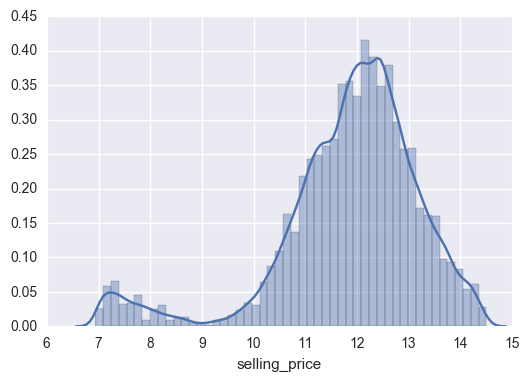

In [12]:
sns.distplot(dataframe['selling_price']);


In [13]:
#skewness and kurtosis
print("Skewness: %f" % dataframe['selling_price'].skew())
print("Kurtosis: %f" % dataframe['selling_price'].kurt())

Skewness: -1.338758
Kurtosis: 2.541066


In [97]:
dataframe = dataframe[dataframe.embadon <2000]
dataframe = dataframe[dataframe.embadon >30]
dataframe = dataframe[dataframe.bedrooms <30]

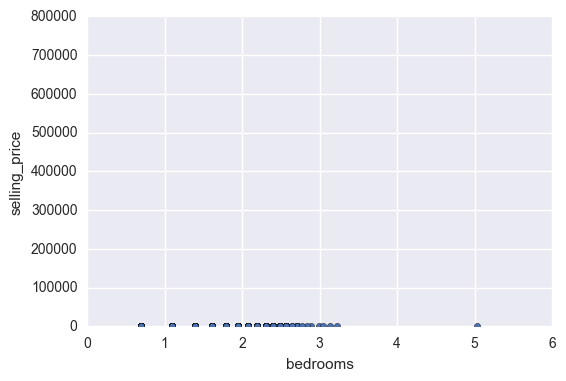

In [14]:
#scatter plot embadon/selling_price
var = 'bedrooms'
data = pd.concat([dataframe['selling_price'], dataframe[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000))

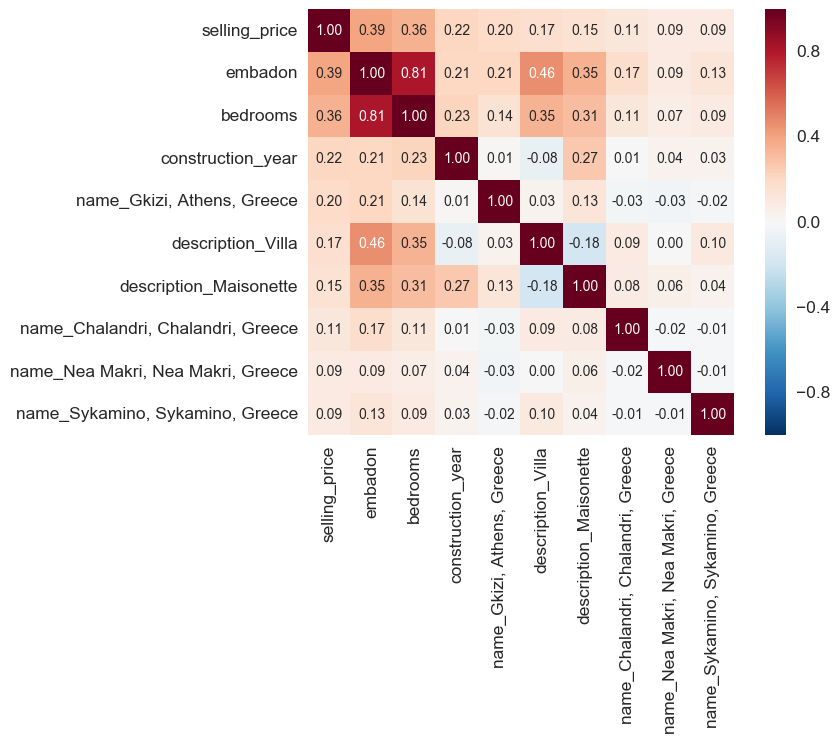

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'selling_price')['selling_price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

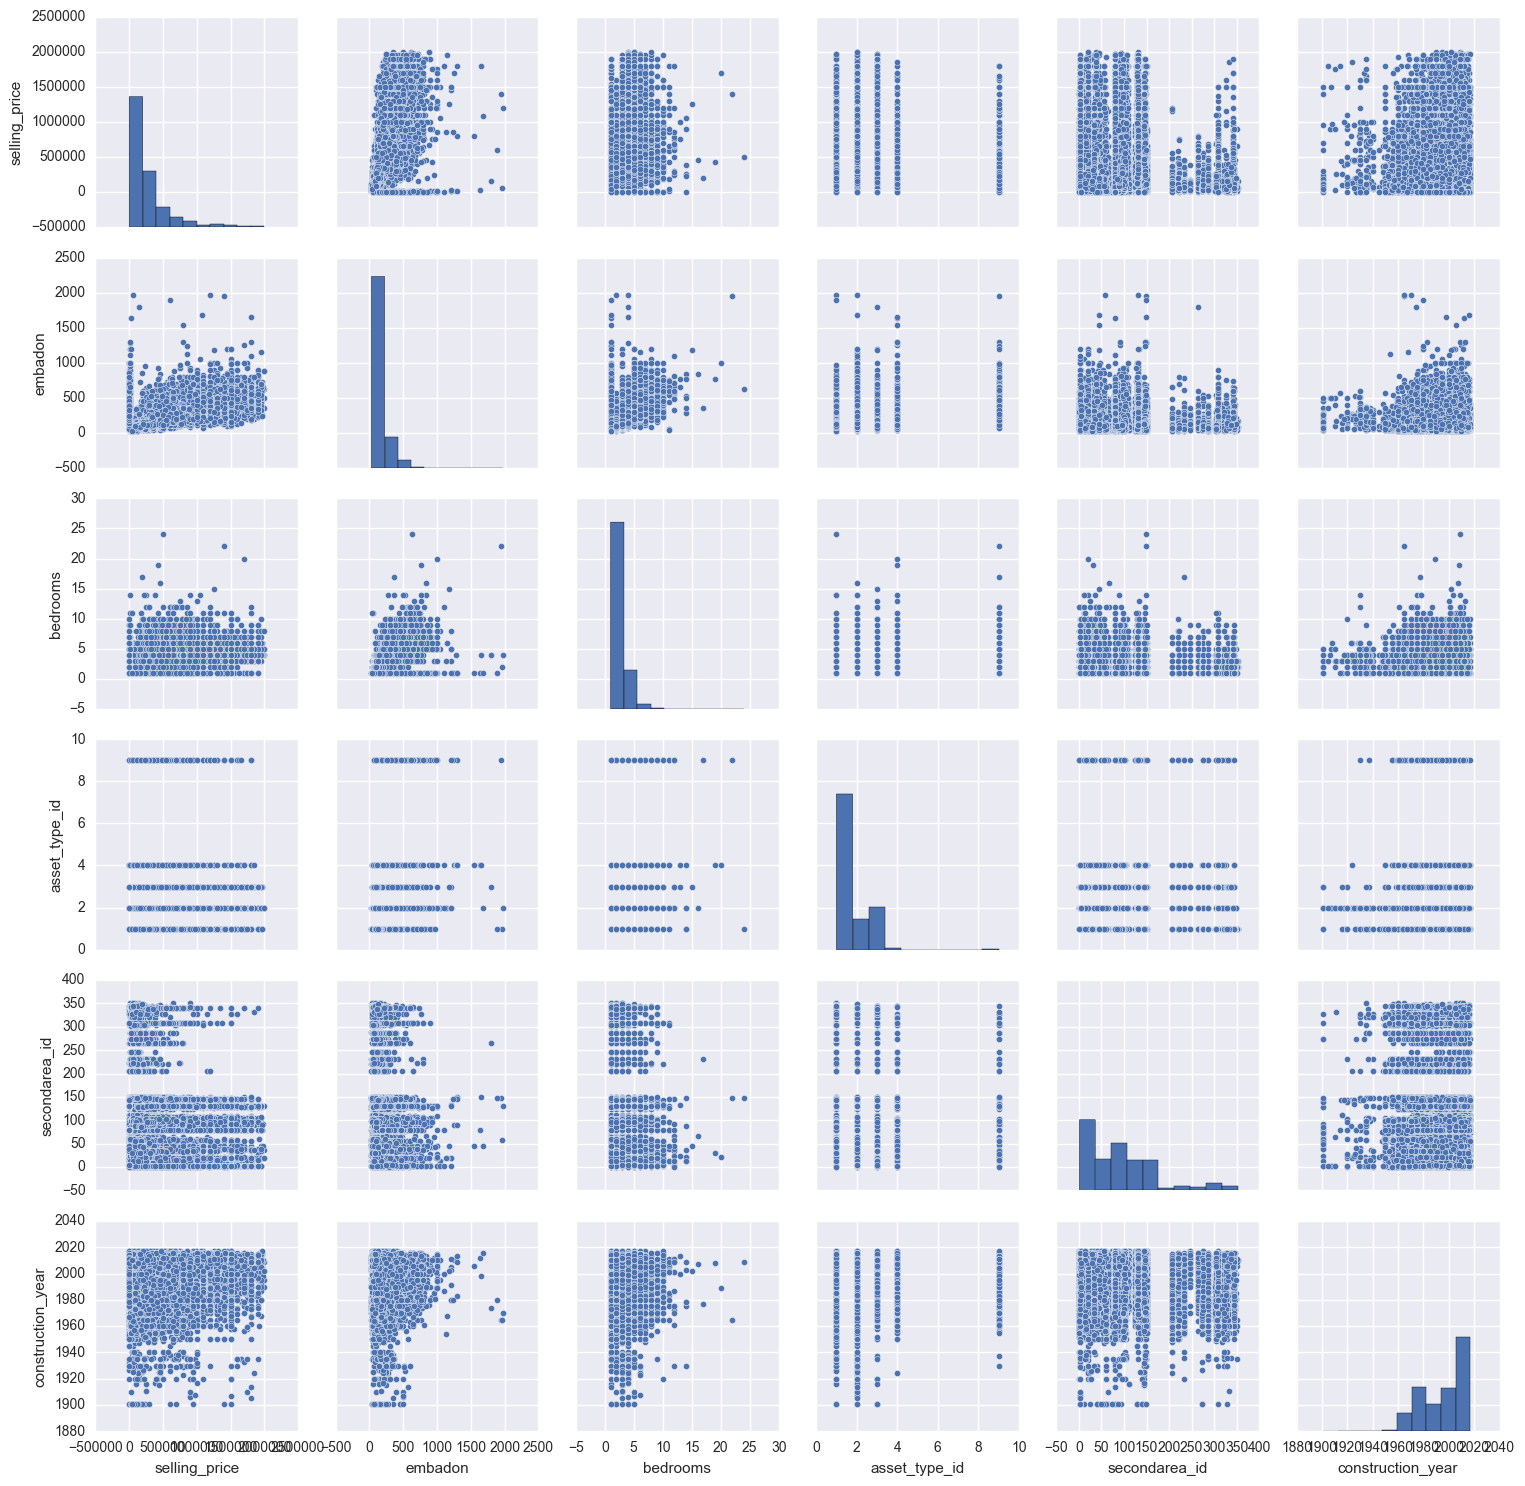

In [16]:
#scatterplot
sns.set()
cols = ['selling_price', 'embadon', 'bedrooms', 'asset_type_id', 'secondarea_id','construction_year']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier()


In [17]:
targets = df.selling_price[:70000]
train  = df.drop('selling_price',axis=1)[:70000]
y_test = df.selling_price[70000:]
test  = df.drop('selling_price',axis=1)[70000:]

In [13]:
from xgboost import XGBClassifier

In [14]:
from sklearn.model_selection import GridSearchCV

run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    #cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    #model = RandomForestClassifier(**parameters)
    
    model = XGBClassifier()

    model.fit(train, targets)

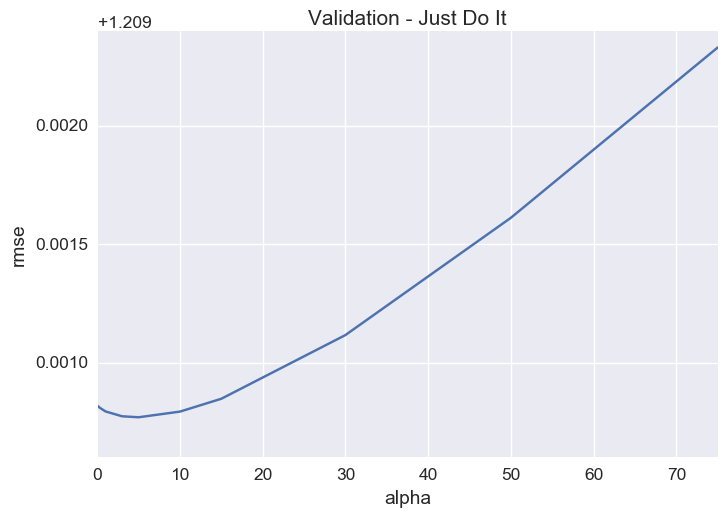

In [18]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, targets, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [19]:
cv_ridge.min()

1.2097692022630802

In [22]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(train, targets)
rmse_cv(model_lasso).mean()

coef = pd.Series(model_lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 84 variables and eliminated the other 53 variables


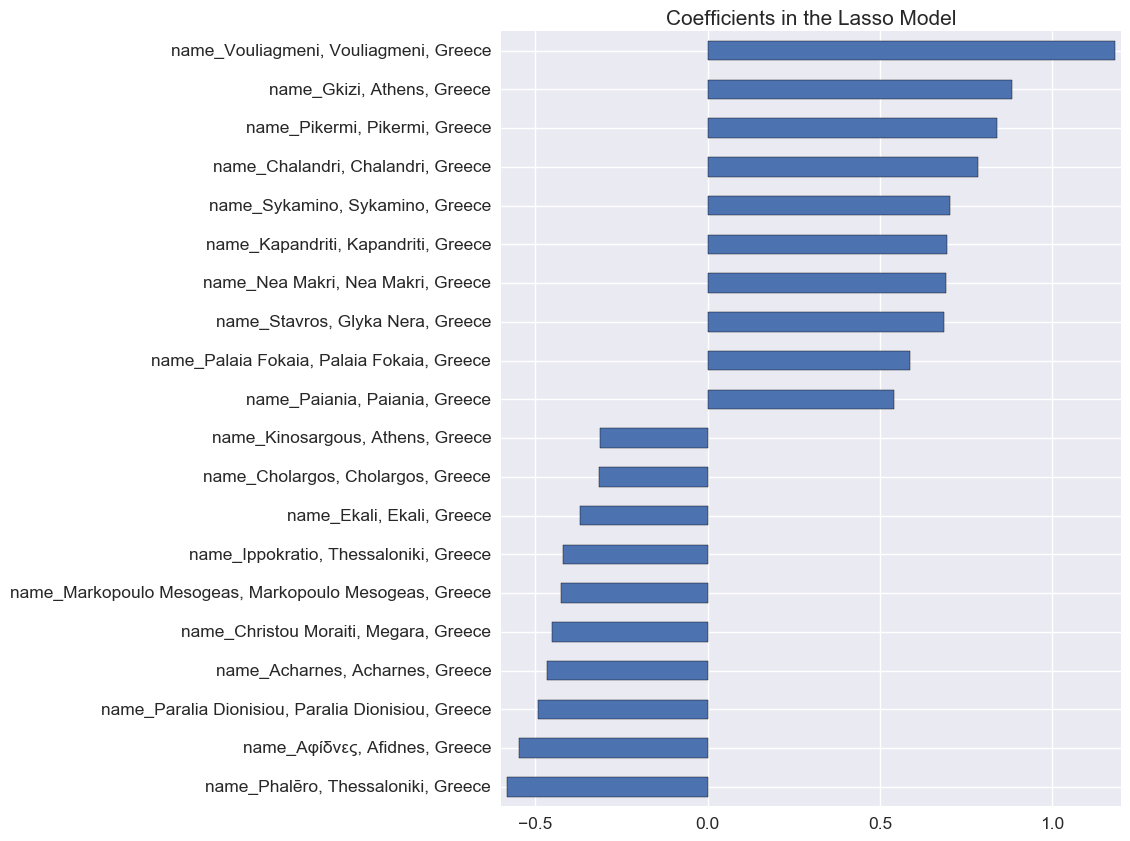

In [23]:
import matplotlib
imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [ ]:
#compute_score(model, train, targets, scoring='accuracy')
from sklearn.metrics import accuracy_score
y_train = model.predict(train)
accuracy_score(targets, y_train)


In [126]:
import xgboost as xgb
dtrain = xgb.DMatrix(train, label = targets)
dtest = xgb.DMatrix(test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

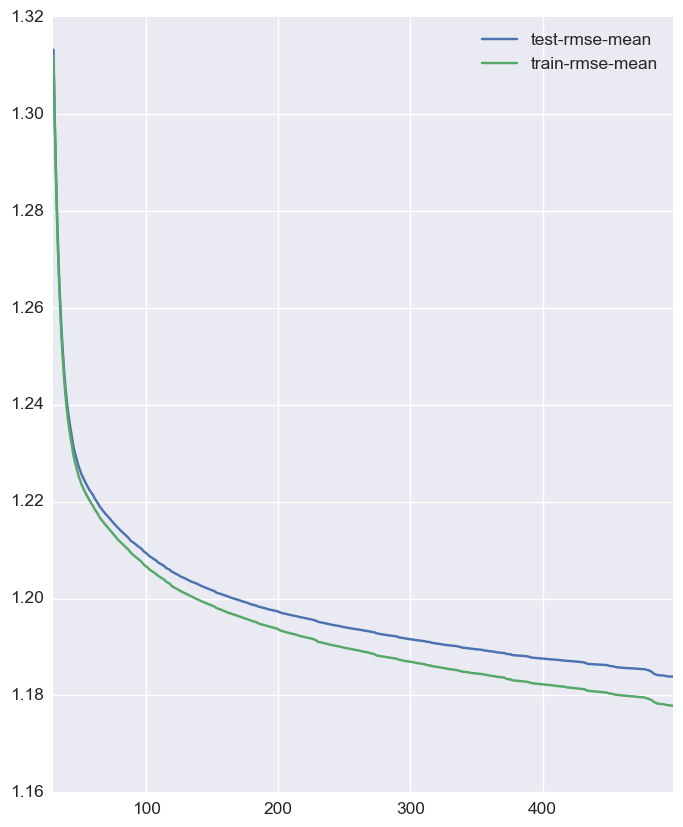

In [127]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()